<a href="https://colab.research.google.com/github/lucerogr/algorithmic-complexity/blob/main/TP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git

Cloning into 'algorithmic_complexity'...
remote: Enumerating objects: 260, done.
remote: Counting objects: 100% (260/260), done.
remote: Compressing objects: 100% (255/255), done.
remote: Total 260 (delta 144), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (260/260), 270.98 KiB | 5.42 MiB/s, done.
Resolving deltas: 100% (144/144), done.


In [4]:
from algorithmic_complexity.aclib import graphstuff as gs

In [5]:
import pandas as pd
import numpy as np
import networkx as nx
import math

In [6]:
url="https://raw.githubusercontent.com/lmcanavals/algorithmic_complexity/main/data/poblaciones.csv"
poblaciones=pd.read_csv(url)
print(poblaciones)

     DEPARTAMENTO         PROVINCIA     DISTRITO  ...    LONGITUD NMI1  NMI2
0        AMAZONAS             BAGUA     ARAMANGO  ...   -78.45299  311  1206
1        AMAZONAS             BAGUA     ARAMANGO  ...  -78.444372   44   129
2        AMAZONAS             BAGUA     ARAMANGO  ...   -78.44472   49   179
3        AMAZONAS             BAGUA        BAGUA  ...  -78.495229    3     8
4        AMAZONAS           BONGARA      CUISPES  ...  -77.965302    1     4
...           ...               ...          ...  ...         ...  ...   ...
3752      UCAYALI  CORONEL PORTILLO  YARINACOCHA  ...  -74.621338   54   186
3753      UCAYALI        PADRE ABAD     CURIMANA  ...   -75.08788  119   483
3754      UCAYALI        PADRE ABAD     CURIMANA  ...  -75.082978    9    43
3755      UCAYALI        PADRE ABAD     CURIMANA  ...  -75.089698   29   132
3756      UCAYALI        PADRE ABAD     CURIMANA  ...  -75.087845   62   277

[3757 rows x 8 columns]


In [7]:
print(len(poblaciones))
poblaciones.head()

3757


,DEPARTAMENTO,PROVINCIA,DISTRITO,CENTRO POBLADO,LATITUD,LONGITUD,NMI1,NMI2
0,AMAZONAS,BAGUA,ARAMANGO,EL MUYO (C.P.L.),-5.422545,-78.45299,311,1206
1,AMAZONAS,BAGUA,ARAMANGO,RESERVA UJUCANO,-5.427565,-78.444372,44,129
2,AMAZONAS,BAGUA,ARAMANGO,TUTUMBEROS,-5.327317,-78.44472,49,179
3,AMAZONAS,BAGUA,BAGUA,ALENYA BAJO,-5.682439,-78.495229,3,8
4,AMAZONAS,BONGARA,CUISPES,MITOPAMPA,-5.93856,-77.965302,1,4


In [8]:
nomdepartamentos = poblaciones['DEPARTAMENTO'].unique()
print(len(nomdepartamentos))
nomdepartamentos

25


array(['AMAZONAS', 'ANCASH', 'APURIMAC', 'AREQUIPA', 'AYACUCHO',
       'CAJAMARCA', 'CUSCO', 'DEPARTAMENTO', 'HUANCAVELICA', 'HUANUCO',
       'ICA', 'JUNIN', 'LA LIBERTAD', 'LAMBAYEQUE', 'LIMA', 'LORETO',
       'MADRE DE DIOS', 'MOQUEGUA', 'PASCO', 'PIURA', 'PUNO',
       'SAN MARTIN', 'TACNA', 'TUMBES', 'UCAYALI'], dtype=object)

In [9]:
departamentos = dict()
for nom in nomdepartamentos:
  departamentos[nom] = poblaciones[poblaciones['DEPARTAMENTO'] == nom]
  print(nom, len(departamentos[nom]))

AMAZONAS 25
ANCASH 190
APURIMAC 87
AREQUIPA 80
AYACUCHO 190
CAJAMARCA 97
CUSCO 85
DEPARTAMENTO 1
HUANCAVELICA 89
HUANUCO 139
ICA 111
JUNIN 85
LA LIBERTAD 345
LAMBAYEQUE 817
LIMA 172
LORETO 224
MADRE DE DIOS 5
MOQUEGUA 49
PASCO 43
PIURA 504
PUNO 83
SAN MARTIN 68
TACNA 33
TUMBES 72
UCAYALI 163


In [12]:
nomprovincias = poblaciones['PROVINCIA'].unique()
print(len(nomprovincias))
nomprovincias

157


array(['BAGUA', 'BONGARA', 'CHACHAPOYAS', 'UTCUBAMBA', 'ANTONIO RAYMONDI',
       'BOLOGNESI', 'CARHUAZ', 'CASMA', 'HUARAZ', 'HUARI', 'HUAYLAS',
       'OCROS', 'POMABAMBA', 'RECUAY', 'SANTA', 'SIHUAS', 'YUNGAY',
       'ABANCAY', 'ANDAHUAYLAS', 'ANTABAMBA', 'AYMARAES', 'CHINCHEROS',
       'GRAU', 'AREQUIPA', 'CAMANA', 'CARAVELI', 'CASTILLA', 'CAYLLOMA',
       'CONDESUYOS', 'CANGALLO', 'HUAMANGA', 'HUANCA SANCOS', 'HUANTA',
       'LUCANAS', 'PARINACOCHAS', 'VICTOR FAJARDO', 'CAJABAMBA',
       'CAJAMARCA', 'CELENDIN', 'CHOTA', 'CONTUMAZA', 'CUTERVO', 'JAEN',
       'SAN IGNACIO', 'SAN MARCOS', 'SAN MIGUEL', 'SAN MIMGUEL',
       'SANTA CRUZ', 'ACOMAYO', 'CALCA', 'CANAS', 'CANCHIS',
       'CHUMBIVILCAS', 'LA CONVENCION', 'PARURO', 'QUISPICANCHI',
       'PROVINCIA', 'CASTROVIRREYNA', 'CHURCAMPA', 'HUANCAVELICA',
       'HUAYTARA', 'TAYACAJA', 'AMBO', 'DOS DE MAYO', 'DOSDEMAYO',
       'HUAMALIES', 'HUANUCO SANTA', 'HUANUCO', 'LAURICOCHA',
       'LEONCIO PRADO', 'MARAÑON', 'PUERTO I

In [13]:
provincias = dict()
for nom in nomprovincias:
  provincias[nom] = poblaciones[poblaciones['PROVINCIA'] == nom]
  print(nom, len(provincias[nom]))

BAGUA 4
BONGARA 8
CHACHAPOYAS 1
UTCUBAMBA 12
ANTONIO RAYMONDI 2
BOLOGNESI 5
CARHUAZ 20
CASMA 14
HUARAZ 38
HUARI 20
HUAYLAS 5
OCROS 2
POMABAMBA 21
RECUAY 28
SANTA 22
SIHUAS 6
YUNGAY 7
ABANCAY 41
ANDAHUAYLAS 8
ANTABAMBA 2
AYMARAES 23
CHINCHEROS 12
GRAU 1
AREQUIPA 24
CAMANA 16
CARAVELI 16
CASTILLA 1
CAYLLOMA 20
CONDESUYOS 3
CANGALLO 20
HUAMANGA 3
HUANCA SANCOS 38
HUANTA 7
LUCANAS 92
PARINACOCHAS 1
VICTOR FAJARDO 29
CAJABAMBA 10
CAJAMARCA 13
CELENDIN 16
CHOTA 6
CONTUMAZA 16
CUTERVO 6
JAEN 11
SAN IGNACIO 2
SAN MARCOS 2
SAN MIGUEL 13
SAN MIMGUEL 1
SANTA CRUZ 1
ACOMAYO 14
CALCA 3
CANAS 4
CANCHIS 12
CHUMBIVILCAS 3
LA CONVENCION 13
PARURO 14
QUISPICANCHI 22
PROVINCIA 1
CASTROVIRREYNA 49
CHURCAMPA 1
HUANCAVELICA 6
HUAYTARA 32
TAYACAJA 1
AMBO 37
DOS DE MAYO 7
DOSDEMAYO 1
HUAMALIES 6
HUANUCO SANTA 1
HUANUCO 27
LAURICOCHA 11
LEONCIO PRADO 28
MARAÑON 12
PUERTO INCA 9
CHINCHA 1
ICA 60
NASCA 6
PALPA 30
PISCO 14
CHANCHAMAYO 14
CHUPACA 13
CONCEPCION 1
HUANCAYO 13
JAUJA 1
JUNIN 2
SATIPO 6
TARMA 35
ASCOPE

In [28]:
nomprovincia = input("Ingrese la provincia para mostrar sus distritos: ")
nomdistritos = provincias[nomprovincia]['DISTRITO'].unique()
print("Hay ", len(nomdistritos), " distritos ")
print(" ")
nomdistritos

distritos = dict()
for nom in nomdistritos:
  distritos[nom] = provincias[nomprovincia][provincias[nomprovincia]['DISTRITO'] == nom]
  print(nom, len(distritos[nom]))


Ingrese la provincia para mostrar sus distritos: ICA
Hay  6  distritos 
 
PACHACUTEC EL 1
PACHACUTEC 13
SAN JOSE DE  LOS MOLINOS 1
SAN JOSE DE LOS MOLINOS 7
SANTIAGO 25
YAUCA DEL ROSARIO 13


In [15]:
def dist(cp1, cp2):
  x1, y1 = float(cp1['LATITUD']), float(cp1['LONGITUD'])
  x2, y2 = float(cp2['LATITUD']), float(cp2['LONGITUD'])

  return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

In [29]:
nomdistrito = input("Ingrese el DISTRITO para mostrar sus CENTROS POBLADOS: ")
distrito = distritos[nomdistrito]

G = nx.Graph()
col = 'CENTRO POBLADO'
for i, cp1 in distrito.iterrows():
  print(cp1[col])
  for j, cp2 in distrito.iterrows():
    if cp1[col] != cp2[col]:
      G.add_edge(cp1[col], cp2[col], weight=dist(cp1, cp2))



Ingrese el DISTRITO para mostrar sus CENTROS POBLADOS: SANTIAGO
EL HUARANGAL
EL PALTO
FUERZA ARMADA
LA CAMPIÑA
LA CAMPIÑA
LA CASTELLANA
LA HUACA - LOS CASTILLOS
LA SETENTICINCO
LOS CASTILLOS
LOS HUAMANIES
LOS LOPEZ
LOS ORE
LOS TRECIENTOS
LUREN
NUEVA SANTA LUCIA
PARAJE
SAN ANTONIO
SAN PEDRO
SAN RAMON
SANTA JULIA
SANTA MARTHA
SANTA RITA DE CASIAS
SANTA VICENTA
SANTA YANINA
VIRGEN DE CHAPI


In [17]:
print(G.nodes)

['NUEVA ESPERANZA', 'PEDRO RUIZ GALLO', 'PEDRO RUIZ', 'SAN JERONIMO', 'SANTA ROSA', 'SEÑOR DE GUALAMITA', 'VILLA ERNESTINA']


In [20]:

list(G.neighbors('NUEVA ESPERANZA'))

['PEDRO RUIZ GALLO',
 'PEDRO RUIZ',
 'SAN JERONIMO',
 'SANTA ROSA',
 'SEÑOR DE GUALAMITA',
 'VILLA ERNESTINA']

In [21]:
def dijkstra(G, s):
    unvisited = []
    visited = []
    total_weight = 0
    current_node = s
    neighbor = ''

    for node in G.nodes:
        if node == s:
            visited.append(s)
        else:
            unvisited.append(node)
    while unvisited:
        for i, neighbor in enumerate(unvisited):
            if i == 0:
                current_weight = G.edges[s, neighbor]['weight']
                current_node = neighbor
            elif G.edges[s, neighbor]['weight'] < current_weight:
                current_weight = G.edges[s, neighbor]['weight']
                current_node = neighbor
        total_weight += current_weight
        unvisited.remove(current_node)
        visited.append(current_node)
    
    total_weight += G.edges[s, current_node]['weight']
    visited.append(s)
    return visited, total_weight

In [34]:
dijkstra(G, 'EL HUARANGAL')

(['EL HUARANGAL',
  'SANTA MARTHA',
  'LA CAMPIÑA',
  'NUEVA SANTA LUCIA',
  'LA SETENTICINCO',
  'SANTA YANINA',
  'SANTA VICENTA',
  'LOS HUAMANIES',
  'PARAJE',
  'VIRGEN DE CHAPI',
  'LOS ORE',
  'SANTA JULIA',
  'SANTA RITA DE CASIAS',
  'LA CASTELLANA',
  'LOS TRECIENTOS',
  'LOS LOPEZ',
  'SAN PEDRO',
  'LA HUACA - LOS CASTILLOS',
  'EL PALTO',
  'LOS CASTILLOS',
  'SAN RAMON',
  'SAN ANTONIO',
  'LUREN',
  'FUERZA ARMADA',
  'EL HUARANGAL'],
 0.8059062242834263)

In [33]:
def path_taken():
    dijkstra(G, 'EL HUARANGAL')
    shortest_path = []
    shortest_weight = 0

    for i, node in enumerate(G.nodes):
        path, weight = dijkstra(G, node)
        #print("")
        #print("Ruta", i + 1, "=", path)
        #print("Distancia =", weight)
        if i == 0:
            shortest_weight = weight
            shortest_path = path
            
        elif weight < shortest_weight:
            shortest_weight = weight
            shortest_path = path
        
    print('--------------------------------------')
    print("La ruta más corta que visita cada ciudad es:", shortest_path)
    print("La distancia de la ruta es:", shortest_weight)

path_taken()

--------------------------------------
La ruta más corta que visita cada ciudad es: ['SANTA YANINA', 'LA SETENTICINCO', 'NUEVA SANTA LUCIA', 'PARAJE', 'LOS HUAMANIES', 'EL HUARANGAL', 'SANTA JULIA', 'SANTA MARTHA', 'LA CAMPIÑA', 'SANTA VICENTA', 'LA CASTELLANA', 'LOS ORE', 'VIRGEN DE CHAPI', 'LOS TRECIENTOS', 'LOS LOPEZ', 'SANTA RITA DE CASIAS', 'LA HUACA - LOS CASTILLOS', 'SAN PEDRO', 'LOS CASTILLOS', 'EL PALTO', 'SAN RAMON', 'SAN ANTONIO', 'FUERZA ARMADA', 'LUREN', 'SANTA YANINA']
La distancia de la ruta es: 0.7366532665440282


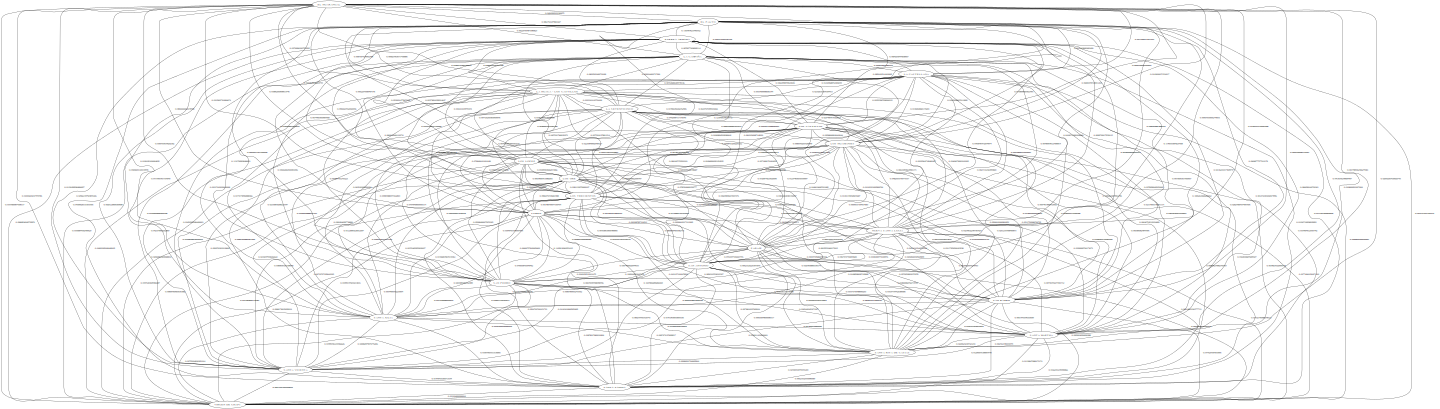

In [32]:
gs.nx2gv(G, weighted=True, params={'size':'20'})